In [1]:
# Libs and Functions
import numpy as np
import matplotlib.pyplot as plt
rnorm = np.random.normal
sample = np.random.choice
runif = np.random.uniform

In [2]:
# Class for results from one run of the bandit
class Bandit_Results:
    def __init__(self, rewards, optimal):
        self.rewards = rewards
        self.optimal = optimal

# Class for summarizing the results of many bandit runs
class Bandit_Summary:
    def __init__(self, exp_rew, prb_opt):
        self.exp_rew = exp_rew
        self.prb_opt = prb_opt

# Run the Bandit once
def one_run(n_arms, T, epsilon):
    # Storage for Rewards and Indicator of Optimal Actions
    R = np.zeros(T)
    O = np.zeros(T)
    # Initialize the Bandit Task
    q_star_a = rnorm(size=n_arms)
    # Initialize the Estimated Values
    # (This is the place you can initialize to encourage exploration)
    q_est_a  = np.zeros(n_arms) # np.array([5.]*len(q_star_a))
    a_counts = np.zeros(n_arms)
    # For each time step
    for t in range(T):
        # Set the optimal and exploratory actions
        opt_acts = np.argwhere(q_est_a == q_est_a.max()).flatten()
        exp_acts = range(n_arms)
        # Decide to exploit or explore.
        if runif() <= 1-epsilon:
            a_now = sample(opt_acts)
        else:
            # Comments here are for softmax exploration
            # wts = np.exp(q_est_a/tau)
            a_now = sample(exp_acts) # , p = wts/sum(wts)
        # Generate Reward, Update Estimates
        r_now = q_star_a[a_now] + rnorm(size=1)
        q_est_a[a_now] = (q_est_a[a_now]*a_counts[a_now]+r_now)/(a_counts[a_now]+1)
        a_counts[a_now] += 1
        # Store Reward and Action
        R[t] = r_now
        O[t] = a_now # Temporarily... will become indicator it equals the best action
    return Bandit_Results(R, O==np.argmax(q_star_a))

# Run the Bandit many times
def run_many(n_tasks, n_arms, T, epsilon):
    # Storage for expected rewards and P(Optimal Choice)
    exp_rew = np.zeros(T)
    prb_opt = np.zeros(T)
    # For each task
    for tsk in range(n_tasks):
        # Get single run and update estimates
        BR = one_run(n_arms, T, epsilon)
        exp_rew = (exp_rew*tsk + BR.rewards)/(tsk+1)
        prb_opt = (prb_opt*tsk + BR.optimal)/(tsk+1)
    return Bandit_Summary(exp_rew, prb_opt)

In [3]:
# Run Bandit Tasks for Different Epsilons
n_tasks = 2000
n_arms  = 10
T = 1000

epsilon = 0
BS0 = run_many(n_tasks, n_arms, T, epsilon)
epsilon = 0.01
BS001 = run_many(n_tasks, n_arms, T, epsilon)
epsilon = 0.1
BS01 = run_many(n_tasks, n_arms, T, epsilon)

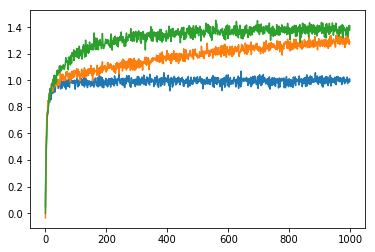

In [4]:
# Plot the Results for Expected Reward
plt.plot(BS0.exp_rew)
plt.plot(BS001.exp_rew)
plt.plot(BS01.exp_rew)
plt.show()

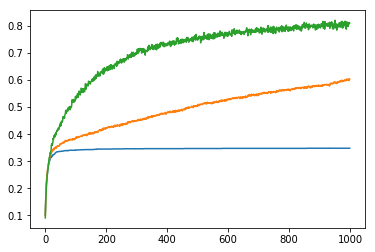

In [5]:
# Plot the Results for P(Optimal Action)
plt.plot(BS0.prb_opt)
plt.plot(BS001.prb_opt)
plt.plot(BS01.prb_opt)
plt.show()